In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import activations

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
PATH = 'Data'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'valid')
test_dir = os.path.join(PATH, 'test')

In [3]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = sum([len(files) for r, d, files in os.walk(test_dir)])

In [4]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
train_image_generator = ImageDataGenerator(dtype='float32', rescale= 1./255.)
validation_image_generator = ImageDataGenerator(dtype='float32', rescale= 1./255.)
test_image_generator = ImageDataGenerator(dtype='float32', rescale= 1./255.)

In [6]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,batch_size = batch_size, target_size = (IMG_HEIGHT,IMG_WIDTH),class_mode = 'categorical')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,batch_size = batch_size, target_size =  (IMG_HEIGHT,IMG_WIDTH),class_mode = 'categorical')
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    shuffle=False,
    class_mode= 'categorical'
)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


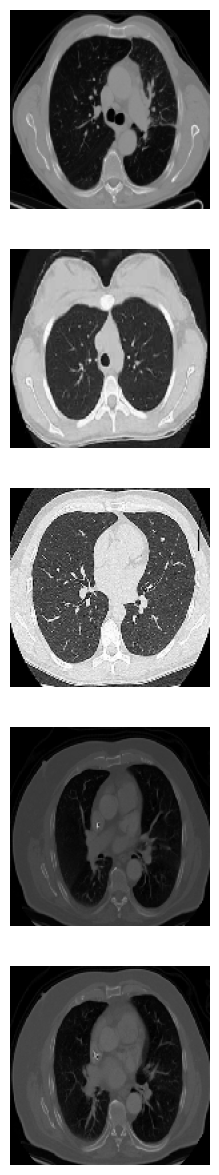

In [7]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()
    
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [8]:
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 33, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(train_data_gen, epochs=25,verbose = 1,
                    validation_data=val_data_gen,steps_per_epoch = 5)

Epoch 1/25


D:\python\Lib\site-packages\keras\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 35s 6s/step - loss: 1.3658 - accuracy: 0.3116 - val_loss: 1.4054 - val_accuracy: 0.4444
Epoch 2/25
5/5 [==============================] - 15s 3s/step - loss: 1.3300 - accuracy: 0.3834 - val_loss: 1.3718 - val_accuracy: 0.1806
Epoch 3/25
5/5 [==============================] - 15s 3s/step - loss: 1.2990 - accuracy: 0.3132 - val_loss: 1.3722 - val_accuracy: 0.2083
Epoch 4/25
5/5 [==============================] - 15s 3s/step - loss: 1.2536 - accuracy: 0.3948 - val_loss: 1.2924 - val_accuracy: 0.3056
Epoch 5/25
5/5 [==============================] - 15s 3s/step - loss: 1.1943 - accuracy: 0.4372 - val_loss: 1.2053 - val_accuracy: 0.4861
Epoch 6/25
5/5 [==============================] - 15s 3s/step - loss: 1.1768 - accuracy: 0.4192 - val_loss: 1.1287 - val_accuracy: 0.4722
Epoch 7/25
5/5 [==============================] - 15s 3s/step - loss: 1.1892 - accuracy: 0.4437 - val_loss: 1.1328 - val_accuracy: 0.5139
Epoch 8/25
5/5 [=============================

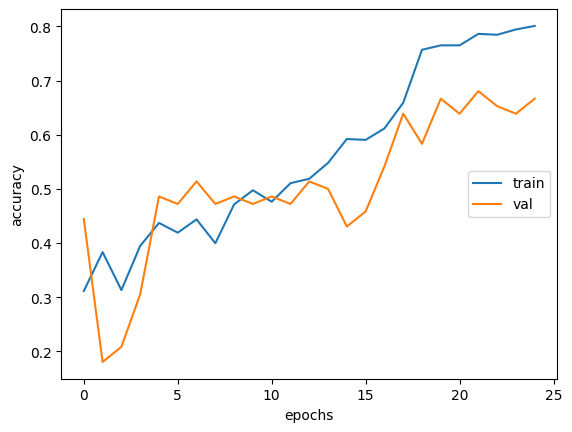

In [11]:
plt.plot(history.history['accuracy'], label = 'train',)
plt.plot(history.history['val_accuracy'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

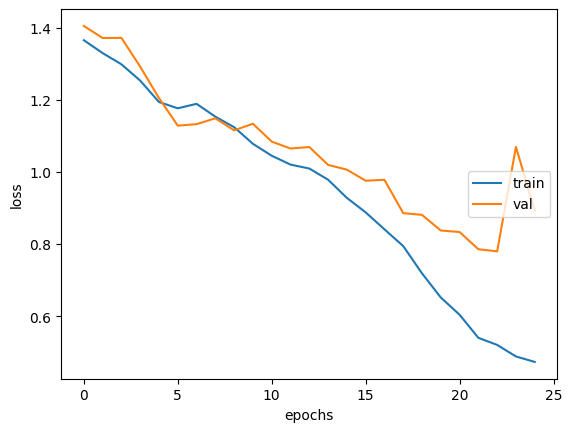

In [12]:
plt.plot(history.history['loss'], label = 'train',)
plt.plot(history.history['val_loss'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [13]:
result = model.evaluate(test_data_gen)

3/3 [==============================] - 8s 3s/step - loss: 0.8473 - accuracy: 0.6063


In [14]:
train_image_generator =  ImageDataGenerator(
dtype='float32', rescale= 1./255.,
horizontal_flip=True,
fill_mode='nearest')

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

Found 613 images belonging to 4 classes.


In [15]:
history = model.fit(train_data_gen, epochs=25,verbose = 1,
                    validation_data=val_data_gen,steps_per_epoch = 5)

Epoch 1/25
5/5 [==============================] - 15s 3s/step - loss: 0.7895 - accuracy: 0.6721 - val_loss: 0.7410 - val_accuracy: 0.6667
Epoch 2/25
5/5 [==============================] - 14s 3s/step - loss: 0.6926 - accuracy: 0.6966 - val_loss: 0.8591 - val_accuracy: 0.5694
Epoch 3/25
5/5 [==============================] - 14s 3s/step - loss: 0.6403 - accuracy: 0.7308 - val_loss: 0.7659 - val_accuracy: 0.6667
Epoch 4/25
5/5 [==============================] - 14s 3s/step - loss: 0.6244 - accuracy: 0.7341 - val_loss: 0.8478 - val_accuracy: 0.6250
Epoch 5/25
5/5 [==============================] - 14s 3s/step - loss: 0.5603 - accuracy: 0.7667 - val_loss: 0.6840 - val_accuracy: 0.6806
Epoch 6/25
5/5 [==============================] - 14s 3s/step - loss: 0.5520 - accuracy: 0.7732 - val_loss: 0.7080 - val_accuracy: 0.6389
Epoch 7/25
5/5 [==============================] - 14s 3s/step - loss: 0.4920 - accuracy: 0.7928 - val_loss: 0.7630 - val_accuracy: 0.6944
Epoch 8/25
5/5 [==================

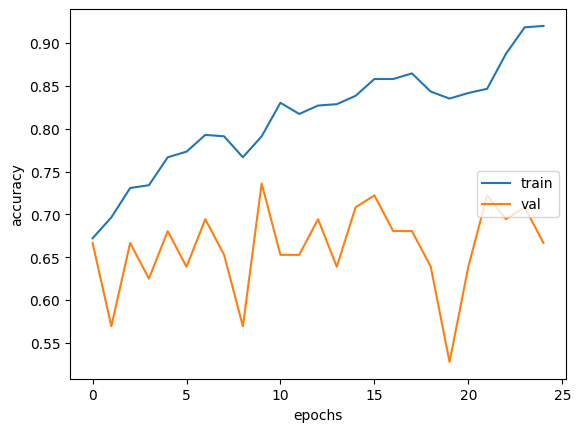

In [16]:
plt.plot(history.history['accuracy'], label = 'train',)
plt.plot(history.history['val_accuracy'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

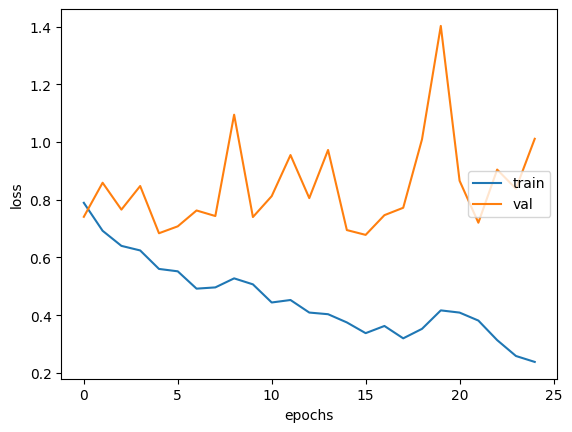

In [17]:
plt.plot(history.history['loss'], label = 'train',)
plt.plot(history.history['val_loss'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [18]:
result = model.evaluate(test_data_gen)

3/3 [==============================] - 5s 1s/step - loss: 0.7581 - accuracy: 0.6667


In [27]:
classes = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

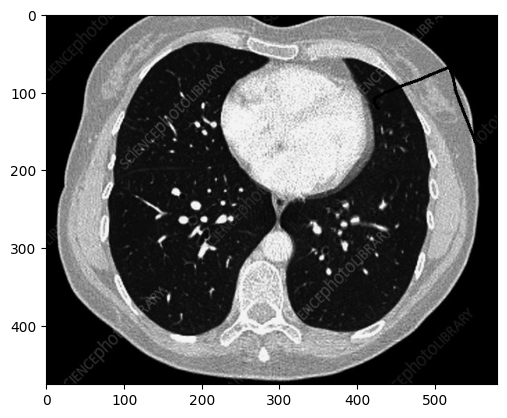

In [21]:
img = cv2.imread('testImg.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
resize  = tf.image.resize(img , (IMG_HEIGHT, IMG_WIDTH))

In [24]:
prob = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 81ms/step


In [31]:
print("Predicted class : ", classes[np.argmax(prob)]," ",np.max(prob)*100,"%")

Predicted class :  normal   99.99994039535522 %


In [32]:
from keras.models import load_model

In [33]:
model.save(os.path.join('models', 'Chest_CT_scan_classification.h5'))